In [3]:
from keras import layers
from keras import models
from keras import optimizers

Using TensorFlow backend.


In [4]:
model = models.Sequential()

model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [5]:
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [6]:
model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [7]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_dir = '../data/dogs-and-cats-small/train'
valid_dir = '../data/dogs-and-cats-small/validation'

train_generator = train_datagen.flow_from_directory(
            train_dir,
            target_size=(150, 150),
            batch_size = 20,
            class_mode='binary')

valid_generator = test_datagen.flow_from_directory(
            valid_dir,
            target_size=(150, 150),
            batch_size=20,
            class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
for data_batch, labels_batch in train_generator:
    print(data_batch.shape)
    print(labels_batch.shape)
    break

(20, 150, 150, 3)
(20,)


In [9]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=30,
        validation_data=valid_generator,
        validation_steps=50)

Epoch 1/30
100/100 [==============================] - 167s 2s/step - loss: 0.6903 - acc: 0.5265 - val_loss: 0.6728 - val_acc: 0.5840
Epoch 2/30
100/100 [==============================] - 240s 2s/step - loss: 0.6568 - acc: 0.6190 - val_loss: 0.6389 - val_acc: 0.6390
Epoch 3/30
100/100 [==============================] - 197s 2s/step - loss: 0.6051 - acc: 0.6795 - val_loss: 0.6066 - val_acc: 0.6650
Epoch 4/30
100/100 [==============================] - 114s 1s/step - loss: 0.5674 - acc: 0.7050 - val_loss: 0.5997 - val_acc: 0.6720
Epoch 5/30
100/100 [==============================] - 113s 1s/step - loss: 0.5391 - acc: 0.7265 - val_loss: 0.6265 - val_acc: 0.6620
Epoch 6/30
100/100 [==============================] - 113s 1s/step - loss: 0.5036 - acc: 0.7615 - val_loss: 0.5656 - val_acc: 0.6980
Epoch 7/30
100/100 [==============================] - 113s 1s/step - loss: 0.4808 - acc: 0.7720 - val_loss: 0.5736 - val_acc: 0.7010
Epoch 8/30
100/100 [==============================] - 113s 1s/step - 

In [10]:
model.save('cats-and-dogs-small-1.h5')

In [11]:
import matplotlib.pyplot as plt

The validation accuracy stalls around 70% because we have a small dataset. The validation loss continues to increase over time while the training loss continues to decrease. This means that the network fits the training data very well, but is progressively doing worse on the validation data; this is indicative of **overfitting**

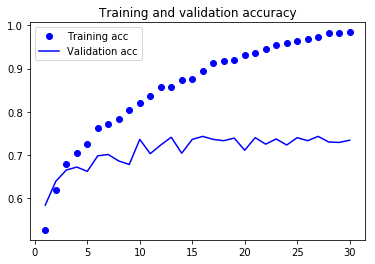

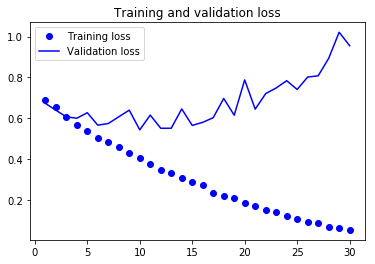

In [12]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

We create a ImageDataGenerator instance which will transform and flip images in order to artificially create new data. This augments our data, and so is called 'data augmentation'. This technique is very useful in small-data situations for computer vision.

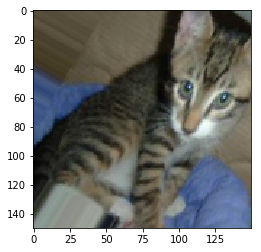

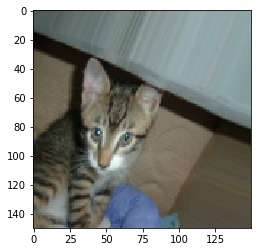

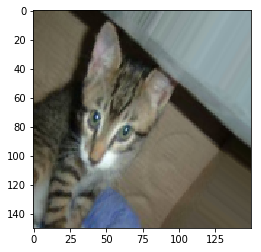

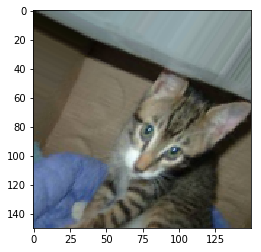

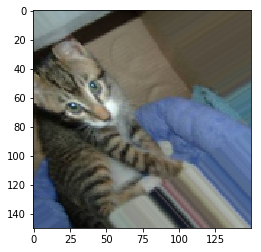

In [13]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

from keras.preprocessing import image
import os

train_cats_dir = os.path.join(train_dir, 'cats')

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[504]

img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)  # Reshaping to (1, 150, 150, 3)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure()
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i == 5:
        break

plt.show()



We used **data augmentation** to remix our existing data, but this may not get rid of the overfitting problem entirely. To mitigate overfitting, we can also add a **Dropout** layer. **Dropout** will randomly drop some units along with their connections to prevent the units from adapting to the data together.

In [14]:
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [15]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

valid_generator = test_datagen.flow_from_directory(
        valid_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [16]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=100,
        validation_data=valid_generator,
        validation_steps=50)

Epoch 1/100
100/100 [==============================] - 185s 2s/step - loss: 0.6912 - acc: 0.5237 - val_loss: 0.6777 - val_acc: 0.5704
Epoch 2/100
100/100 [==============================] - 181s 2s/step - loss: 0.6811 - acc: 0.5637 - val_loss: 0.6893 - val_acc: 0.5309
Epoch 3/100
100/100 [==============================] - 180s 2s/step - loss: 0.6699 - acc: 0.5894 - val_loss: 0.6451 - val_acc: 0.6148
Epoch 4/100
100/100 [==============================] - 181s 2s/step - loss: 0.6602 - acc: 0.6100 - val_loss: 0.6277 - val_acc: 0.6353
Epoch 5/100
100/100 [==============================] - 181s 2s/step - loss: 0.6466 - acc: 0.6200 - val_loss: 0.7131 - val_acc: 0.5508
Epoch 6/100
100/100 [==============================] - 180s 2s/step - loss: 0.6295 - acc: 0.6478 - val_loss: 0.5876 - val_acc: 0.6927
Epoch 7/100
100/100 [==============================] - 180s 2s/step - loss: 0.6153 - acc: 0.6666 - val_loss: 0.5900 - val_acc: 0.6694
Epoch 8/100
100/100 [==============================] - 181s 2s

Epoch 62/100
100/100 [==============================] - 184s 2s/step - loss: 0.4402 - acc: 0.7997 - val_loss: 0.4503 - val_acc: 0.7817
Epoch 63/100
100/100 [==============================] - 187s 2s/step - loss: 0.4425 - acc: 0.7919 - val_loss: 0.4984 - val_acc: 0.7764
Epoch 64/100
100/100 [==============================] - 184s 2s/step - loss: 0.4500 - acc: 0.7937 - val_loss: 0.4799 - val_acc: 0.7809
Epoch 65/100
100/100 [==============================] - 184s 2s/step - loss: 0.4471 - acc: 0.7938 - val_loss: 0.4721 - val_acc: 0.7963
Epoch 66/100
100/100 [==============================] - 186s 2s/step - loss: 0.4318 - acc: 0.7991 - val_loss: 0.4567 - val_acc: 0.8138
Epoch 67/100
100/100 [==============================] - 186s 2s/step - loss: 0.4455 - acc: 0.7894 - val_loss: 0.4661 - val_acc: 0.7849
Epoch 68/100
100/100 [==============================] - 187s 2s/step - loss: 0.4409 - acc: 0.7900 - val_loss: 0.6279 - val_acc: 0.7384
Epoch 69/100
100/100 [==============================] -

In [17]:
model.save('cats_and_dogs_small_2.h5')

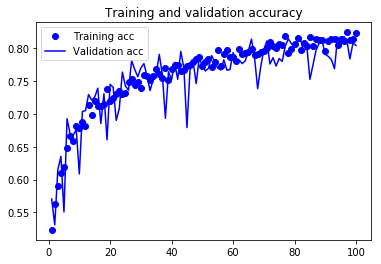

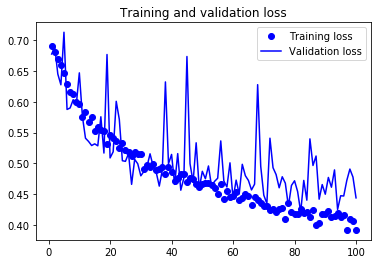

In [18]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [22]:
print(f'val_acc: {max(history.history["val_acc"])}')
print(f'val_loss: {min(history.history["val_loss"])}')

val_acc: 0.8176546391752577
val_loss: 0.4208581138824679


# Summary
We got a validation accuracy of about 80% by training our convnet from scratch on a subset of the dogs vs. cats dataset from Kaggle.

We used **Conv2D** layers to learn patterns and **MaxPooling2D** to extract the features that appeared the most through the filters. When we trained this model with just a small part of the dataset (2000 images for train and 1000 for validation), we reached a maximum validation accuracy of about 70% after just 7/30 epochs. The validation loss reached a minimum of about 60% also at epoch 7/30, and then it increased to ~99.6%, very bad.

We then used **data augmentation** with the **ImageDataGenerator**. We shifted the image in random directions, rotated it random amounts, and flipped a random number of the images in order to artificially provide more data to train the convnet. We also used a **Dropout** layer before the **Flatten** layer with a value of 0.5 to randomly drop half of the input units. This allowed us to reach a validation accuracy of about 80%, a large improvement, and a validation loss of about 45%, a much greater improvement.